In [1]:
import os 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize': (8,6)})
%matplotlib inline

#datetime lib:
from pandas import to_datetime
import itertools 
import warnings 
import datetime 
warnings.filterwarnings('ignore')

#SKlearn lib:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz

from sklearn.neighbors import KNeighborsRegressor


In [2]:
main = 'C:\\Users\**\Desktop'
gla_file = os.path.join(main, 'final_merge4.csv')
gla_data = pd.read_csv(gla_file)

print(gla_data.shape) #(331654, 29)
gla_data.head()

(804600, 37)


index          county              district       oa11     lsoa11  \
0  1787073  GREATER LONDON              LEWISHAM  E00016638  E01003296   
1  1811124  GREATER LONDON              LEWISHAM  E00016638  E01003296   
2  1870838  GREATER LONDON                MERTON  E00017413  E01003447   
3   359864  GREATER LONDON               BROMLEY  E00003311  E01000683   
4  2144715  GREATER LONDON  RICHMOND UPON THAMES  E00019520  E01003883   

      msoa11  postcode                           ADDRESS        lat      long  \
0  E02000664  SE13 5FP  014 Brick Kiln One, Station Road  51.465100 -0.012095   
1  E02000664  SE13 5FL  036 River Mill One, Station Road  51.465120 -0.012728   
2  E02000704  SW20 0AN                   1, Aboyne Drive  51.408534 -0.243936   
3  E02000161   BR6 9UD                  1, Ambrose Close  51.367211  0.089848   
4  E02000797   TW2 6RR                  1, Barneby Close  51.446627 -0.346002   

   ...  Fare_Zone  Deprivation_Index  driving_distance_miles  Median(£)-2011  \
0  ...        3.0           5.850052                    5.81        190000.0   
1  ...        3.0           5.850052                    5.81        190000.0   
2  ...        4.0           3.240188                   13.92        210000.0   
3  ...        6.0          -2.300779                   17.67        230000.0   
4  ...        5.0          -2.432610                   16.01        374950.0   

   connec_air_public  connec_air_car  connec_road_car  \
0           0.438756        0.253657         0.434362   
1           0.438756        0.253657         0.434362   
2           0.360948        0.284701         0.447893   
3           0.266449        0.254481         0.464440   
4           0.392929        0.357184         0.524401   

   Gross Domestic Product: Quarter on Quarter growth: CVM SA %  \
0                                                0.3             
1                                                0.7             
2                                                0.5             
3                                                0.6             
4                                                1.2             

   Construction, cont Q on Q yr ago  \
0                             -0.13   
1                             -0.07   
2                              0.16   
3                              0.23   
4                             -0.03   

   Real Estate Activities (period on period growth) %:CVM  
0                                                0.5       
1                                               -0.4       
2                                                1.5       
3                                                0.3       
4                                                1.5       

[5 rows x 37 columns]

In [3]:
gla_data.columns

Index(['index', 'county', 'district', 'oa11', 'lsoa11', 'msoa11', 'postcode',
       'ADDRESS', 'lat', 'long', 'property_type', 'new_build', 'duration',
       'category', 'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA',
       'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'PROPERTY_TYPE',
       'BUILT_FORM', 'LODGEMENT_DATE', 'deed_date', 'year', 'quarter',
       'price_paid', 'Fare_Zone', 'Deprivation_Index',
       'driving_distance_miles', 'Median(£)-2011', 'connec_air_public',
       'connec_air_car', 'connec_road_car',
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago',
       'Real Estate Activities (period on period growth) %:CVM'],
      dtype='object')

In [4]:
gla_data.isnull().sum()

index                                                               0
county                                                              0
district                                                            0
oa11                                                               24
lsoa11                                                             24
msoa11                                                             24
postcode                                                            0
ADDRESS                                                             0
lat                                                                24
long                                                               24
property_type                                                       0
new_build                                                           0
duration                                                            0
category                                                            0
CURRENT_ENERGY_RATIN

In [5]:
gla_data.dropna(subset=['Fare_Zone', 'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011', 'NUMBER_HABITABLE_ROOMS', 
                       'NUMBER_HEATED_ROOMS'], inplace=True)
print(gla_data.shape)
##(331654, 29) -> 331643, 29)

(683505, 37)


In [6]:
#Limiting the data:

gla_data2 = gla_data[['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'PROPERTY_TYPE', 'BUILT_FORM', 'price_paid', 'Fare_Zone',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011']]

In [29]:
#Work in sample of data:
gla_data3 = gla_data2.sample(frac=0.30)
print(gla_data3.shape)

(205052, 17)


In [7]:
#Visualise data using seaborn - Step 1:

#Clip outliers out:
gla_plot = gla_data2

cols_clip = ['TOTAL_FLOOR_AREA', 'NUMBER_HEATED_ROOMS', 'price_paid']

for i in cols_clip:
    lower = gla_plot[i].quantile(0.3)
    upper = gla_plot[i].quantile(0.97)
    gla_plot[i] = gla_plot[i].clip(lower, upper)

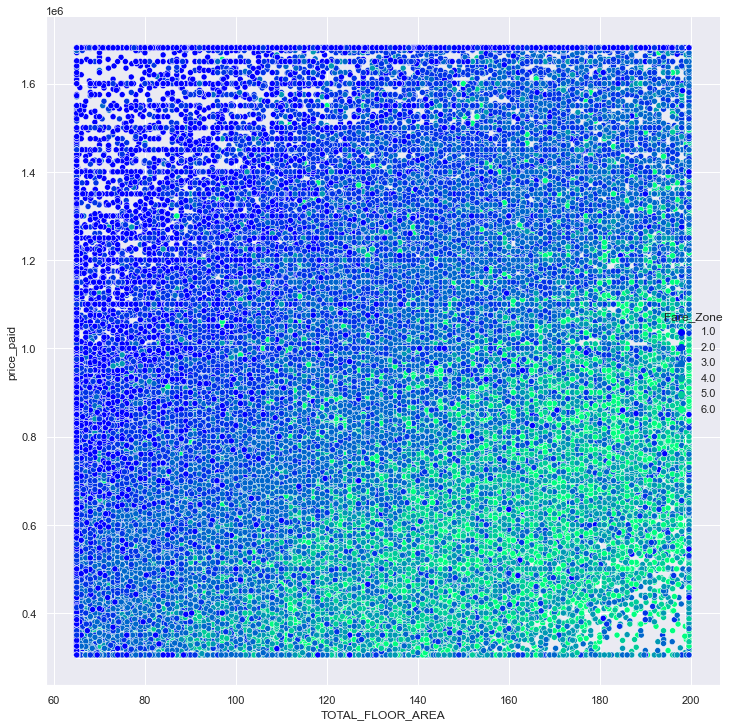

In [8]:
#Visualise data using seaborn - Step 2:

sns.relplot(data=gla_plot, x='TOTAL_FLOOR_AREA', y='price_paid', hue='Fare_Zone', palette='winter', height = 10)

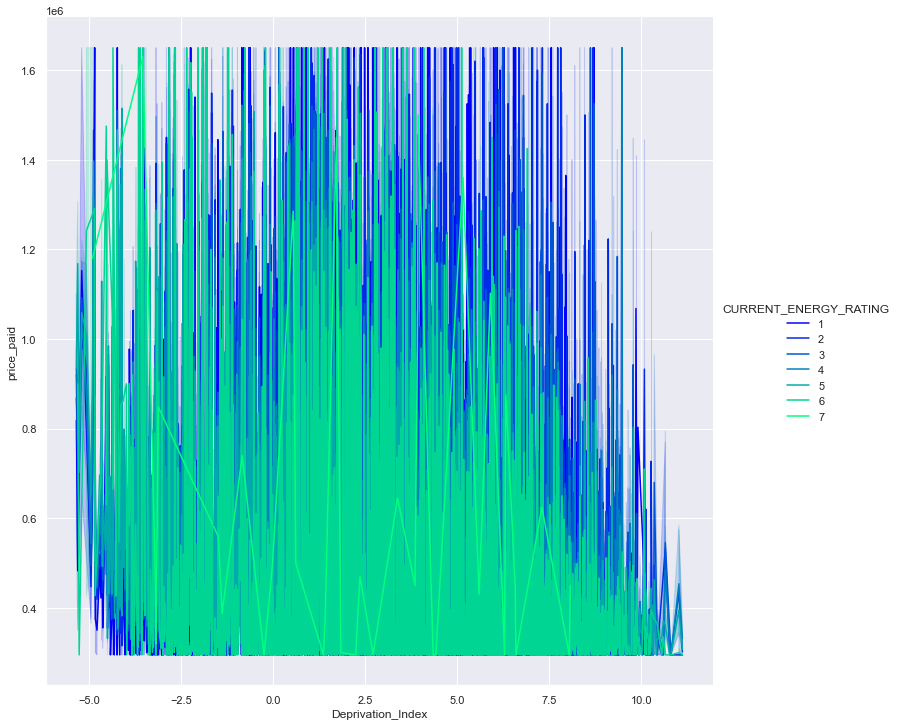

In [30]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='CURRENT_ENERGY_RATING', kind="line", palette='winter', height = 10)

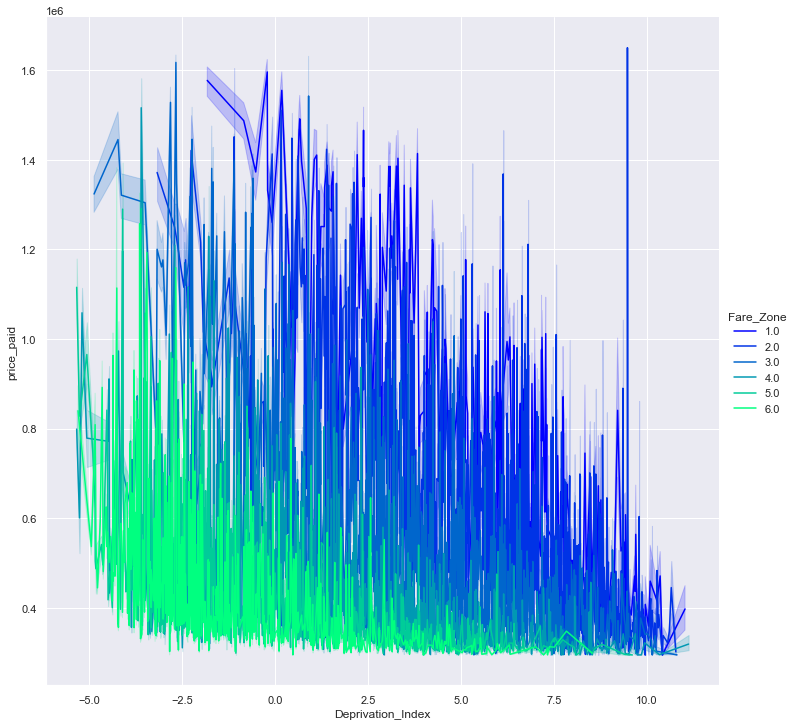

In [34]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='Fare_Zone', kind="line", palette='winter', height = 10)

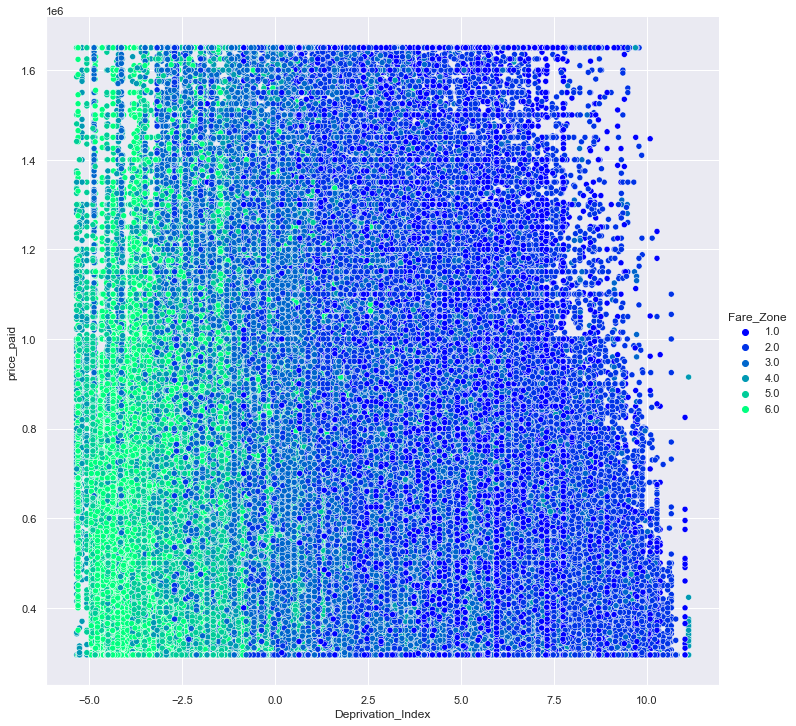

In [33]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='Fare_Zone', palette='winter', height = 10)

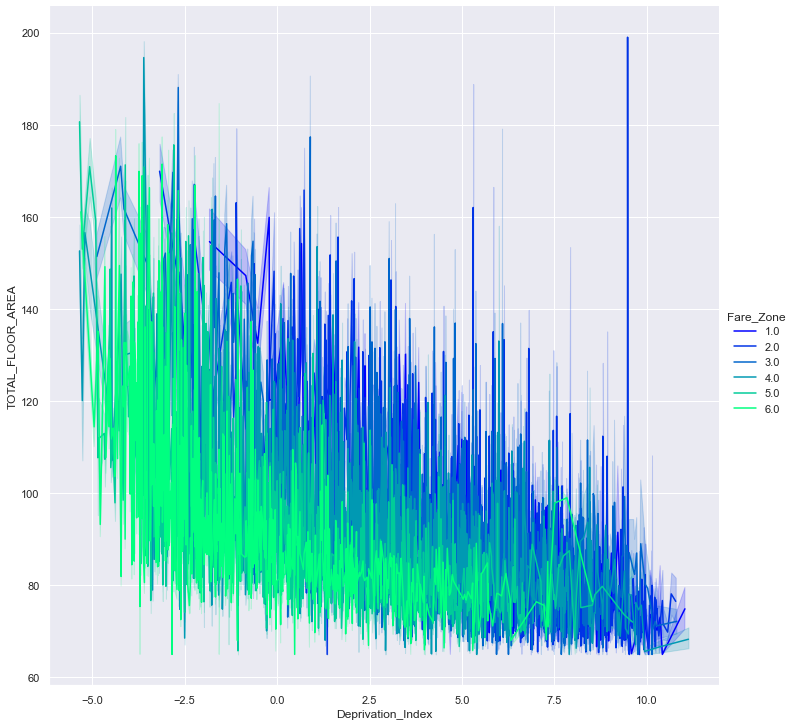

In [35]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='Fare_Zone', kind='line', palette='winter', height = 10)

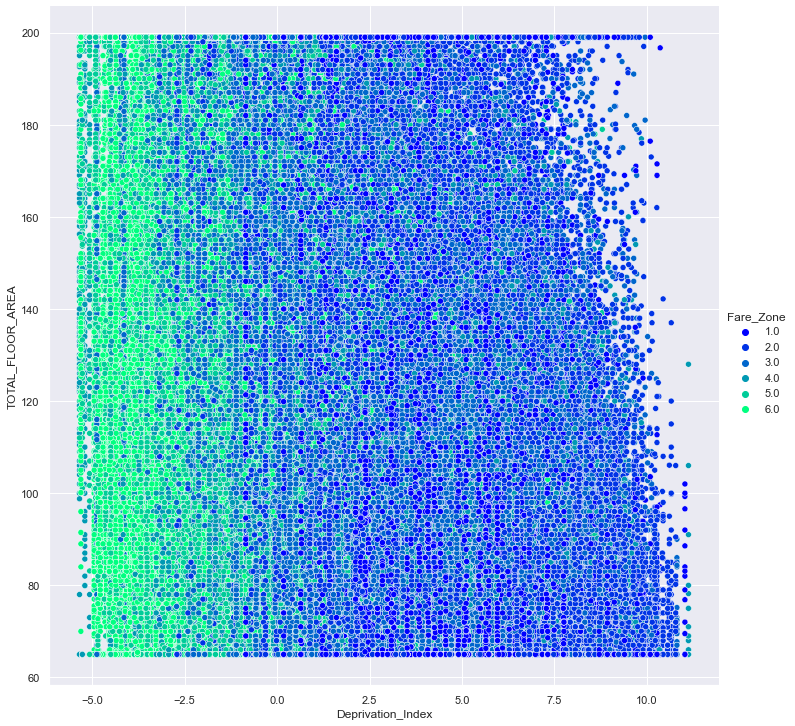

In [36]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='Fare_Zone', palette='winter', height = 10)

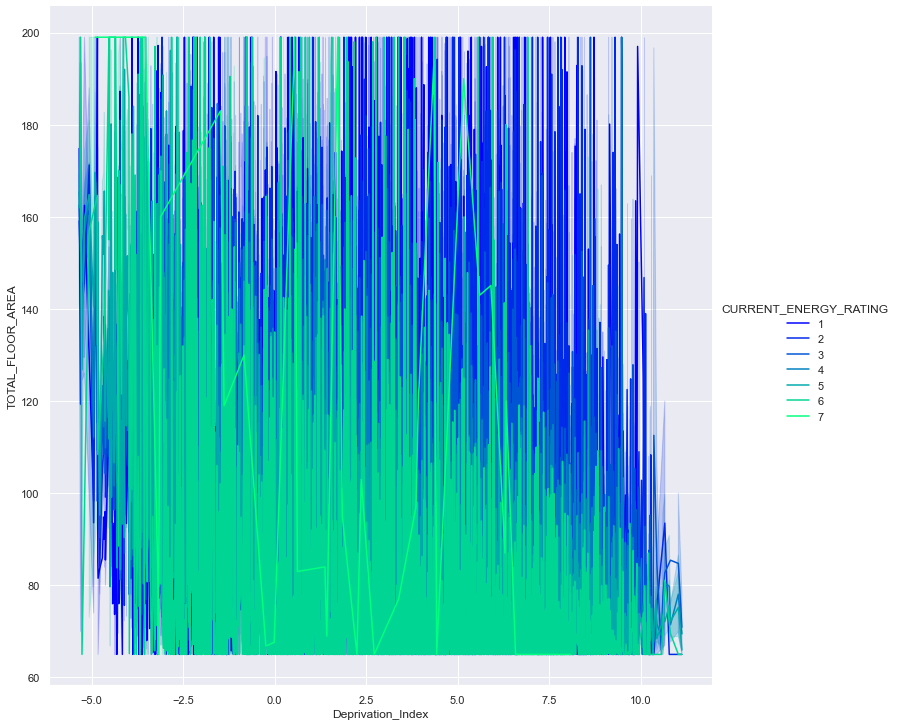

In [37]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='CURRENT_ENERGY_RATING', kind='line', palette='winter', height = 10)

In [8]:
#Investigate elements within each feature:

for column in gla_data2:
    unique_vals = np.unique(gla_data2[column])
    nr_vals = len(unique_vals)
    if nr_vals <60:
        print('The number of unique values for feature {}: {} - {}'.format(column, nr_vals, unique_vals))
    else:
        print('The number of unique values for feature {}: {}'.format(column, nr_vals))

The number of unique values for feature property_type: 4 - [1. 3. 4. 5.]
The number of unique values for feature new_build: 2 - [0. 1.]
The number of unique values for feature duration: 2 - [0. 1.]
The number of unique values for feature category: 1 - [1.]
The number of unique values for feature CURRENT_ENERGY_RATING: 7 - [1. 2. 3. 4. 5. 6. 7.]
The number of unique values for feature TOTAL_FLOOR_AREA: 2218
The number of unique values for feature NUMBER_HABITABLE_ROOMS: 16 - [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 17. 31.]
The number of unique values for feature NUMBER_HEATED_ROOMS: 17 - [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 17. 31.]
The number of unique values for feature MULTI_GLAZE_PROPORTION: 91
The number of unique values for feature WINDOWS_DESCRIPTION: 4 - [  0.  50.  75. 100.]
The number of unique values for feature PROPERTY_TYPE: 4 - [2. 3. 4. 5.]
The number of unique values for feature BUILT_FORM: 6 - [0. 1. 2. 3. 4. 5.]
The number of un

In [30]:
#Scale Columns, converting raw numbers in scale from zero to one.

scale_vars = ['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'Deprivation_Index', 'driving_distance_miles']

scaler = MinMaxScaler()   
gla_data3[scale_vars] = scaler.fit_transform(gla_data3[scale_vars])
gla_data3.head()

property_type  new_build  duration  category  CURRENT_ENERGY_RATING  \
187172            1.0        0.0       1.0       1.0                    4.0   
763046            3.0        0.0       0.0       1.0                    4.0   
111319            5.0        0.0       1.0       1.0                    5.0   
704613            4.0        0.0       1.0       1.0                    5.0   
7585              4.0        0.0       1.0       1.0                    3.0   

        TOTAL_FLOOR_AREA  NUMBER_HABITABLE_ROOMS  NUMBER_HEATED_ROOMS  \
187172          0.021585                0.050505             0.069444   
763046          0.012208                0.030303             0.041667   
111319          0.022500                0.050505             0.069444   
704613          0.028447                0.060606             0.083333   
7585            0.019840                0.040404             0.055556   

        MULTI_GLAZE_PROPORTION  WINDOWS_DESCRIPTION  PROPERTY_TYPE  \
187172                     1.0                  1.0            5.0   
763046                     0.0                  0.0            4.0   
111319                     1.0                  1.0            5.0   
704613                     1.0                  1.0            5.0   
7585                       1.0                  1.0            5.0   

        BUILT_FORM  price_paid  Fare_Zone  Deprivation_Index  \
187172         3.0    362000.0        5.0           0.712442   
763046         1.0    492000.0        2.0           0.716030   
111319         5.0    660000.0        4.0           0.103790   
704613         4.0    685000.0        4.0           0.053580   
7585           4.0    268300.0        4.0           0.587663   

        driving_distance_miles  Median(£)-2011  
187172                0.504708        162000.0  
763046                0.122175        305000.0  
111319                0.299435        415000.0  
704613                0.295198        304998.0  
7585                  0.259887        225000.0

In [12]:
#Clear memory before running:
gla_data.info(verbose=False, memory_usage='deep')
gla_data2.info(verbose=False, memory_usage='deep')
gla_data3.info(verbose=False, memory_usage='deep')
del gla_data, gla_data2, gla_plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683505 entries, 2 to 804599
Columns: 37 entries, index to Real Estate Activities (period on period growth) %:CVM
dtypes: float64(25), int64(2), object(10)
memory usage: 586.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683505 entries, 2 to 804599
Columns: 17 entries, property_type to Median(£)-2011
dtypes: float64(17)
memory usage: 93.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683505 entries, 2 to 804599
Columns: 41 entries, TOTAL_FLOOR_AREA to BUILT_FORM_5.0
dtypes: float64(9), uint8(32)
memory usage: 73.0 MB


In [31]:
#Splitting the data to independent and dependent variables:

X = gla_data3.drop('price_paid', axis=1).values
y = gla_data3['price_paid'].values
print('Shape of X: {}'.format(np.shape(X)))
print('shape of y: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)


Shape of X: (205052, 16)
shape of y: (205052,)


In [18]:
#running the KNN Regressor
knn = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', algorithm='auto', metric='cosine', n_jobs=5)
knn.fit(X_train, y_train)

#Accuracy on train:
print('Training accuracy score is: ', knn.score(X_train, y_train))
#Accuracy on test:
print('Testing accuracy score is: ', knn.score(X_test, y_test))

Training accuracy score is:  0.627478582717061
Testing accuracy score is:  0.4406319302048112


In [32]:
#Tune KNN

from itertools import product
n_neighbours = [10, 20, 50]
# distance_metric = ['minkowski', 'cosine']
distance_metric = ['cosine']
weight_func = ['uniform', 'distance']

for i, j, k in product(n_neighbours, distance_metric, weight_func):
    print(i, ', ', j, ', ', k)
    knn = KNeighborsRegressor(n_neighbors=i, metric=j, weights=k, algorithm='auto', n_jobs=5)
    knn.fit(X_train, y_train)
    print('Training accuracy for neighbours = {}, distance = {}, and weight = {}, is: {}'.format(i, j, k, knn.score(X_train, y_train)))
    print('Testing accuracy for neighbours = {}, distance = {}, and weight = {}, is: {}'.format(i, j, k, knn.score(X_test, y_test)))
    print()

10 ,  cosine ,  uniform
Training accuracy for neighbours = 10, distance = cosine, and weight = uniform, is: 0.5743486077724098
Testing accuracy for neighbours = 10, distance = cosine, and weight = uniform, is: 0.5142051786303472

10 ,  cosine ,  distance
Training accuracy for neighbours = 10, distance = cosine, and weight = distance, is: 0.9860902328121625
Testing accuracy for neighbours = 10, distance = cosine, and weight = distance, is: 0.5124288775488839

20 ,  cosine ,  uniform
Training accuracy for neighbours = 20, distance = cosine, and weight = uniform, is: 0.5271042497093887
Testing accuracy for neighbours = 20, distance = cosine, and weight = uniform, is: 0.5005414809795021

20 ,  cosine ,  distance
Training accuracy for neighbours = 20, distance = cosine, and weight = distance, is: 0.9859014832883887
Testing accuracy for neighbours = 20, distance = cosine, and weight = distance, is: 0.5197823043400693

50 ,  cosine ,  uniform
Training accuracy for neighbours = 50, distance = 